Введите тип задания: 
1)Решение нелинейных уравнений
2)Решение систем нелинейных уравнений
q)Выйти 2
Введите номер системы уравнений: 
1)========================
|y + cos(x-2) = -0.5
|y-arcssin(x+15)=1.5
q) Выйти1
Введите погрешность0
Была установлена базовая точность


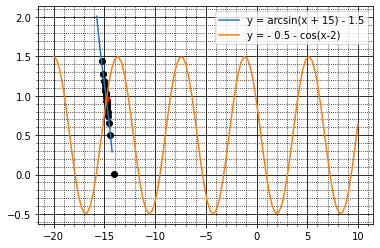

Первый корень системы:  0.9511498328793181
Второй корень системы:  -14.810706271741322
Количество итераций:  1000
Введите тип задания: 
1)Решение нелинейных уравнений
2)Решение систем нелинейных уравнений
q)Выйти q


In [ ]:
from typing import Callable
import unittest
import matplotlib.pyplot as plt
import numpy as np
import warnings

warnings.filterwarnings("ignore", category=RuntimeWarning)

func = lambda x: x ** 3 + 2.28*x ** 2 - 1.934*x - 3.907
func1 = lambda x: x ** 3 - x + 4
func2 = lambda x: x ** 2 - 20 * np.sin(x)

func_sys1 = lambda x1: (-1) * np.sqrt(x1 ** - 9)
func_sys2 = lambda x1: (-1) * x1 + 3

fun_sys1 = lambda x: np.sin(x + 2) - 15
fun_sys2 = lambda x: 0.5 - np.cos(x - 2)


class NonLinearSystem:
    def iteration(fu1, fu2,  eps: float = 1e-7, kmax: int = 1e3) -> float:
        fig = plt.subplots()
        fuplot = lambda x: (-1) * np.arcsin(x + 15) + 1.15
        xplt = np.linspace(-20, 10, 100)
        plt.plot(xplt, fuplot(xplt), label='y = arcsin(x + 15) - 1.5')
        plt.plot(xplt, fu1(xplt), label='y = - 0.5 - cos(x-2)')
        plt.minorticks_on()
        plt.grid(which='major',
                 color='k')
        plt.grid(which='minor',
                 color='k',
                 linestyle=':')
        plt.legend()
        x0, y0, d1, d2, i = 0, 0, 1, 1, 0
        while 1:
            x, y = fu1(y0), fu2(x0)
            d1, d2 = fu1(x) - x, y - fu2(y)
            x0, y0, i = x, y, i + 1
            plt.scatter(y, fuplot(y), color='black')
            if not (abs(d1) > eps and abs(d2) > eps and i < kmax):
                break
        plt.scatter(y, fuplot(y), color='red')
        plt.show()
        return x, y, i


class NonLinearEquation:
    def secant(f: Callable[[float], float], x0: float, eps: float = 1e-7, kmax: int = 1e3, left: float = -5,
               right: float = 5) -> float:
        x, x_prev, i = x0, x0 + 2 * eps, 0
        while abs(x - x_prev) >= eps and i < kmax:
            x, x_prev, i = x - f(x) / (f(x) - f(x_prev)) * (x - x_prev), x, i + 1

        fig = plt.subplots()
        xplt = np.linspace(left, right, 100)
        plt.plot(xplt, f(xplt), label="secant")
        plt.minorticks_on()
        plt.grid(which='major',
                 color='k')
        plt.grid(which='minor',
                 color='k',
                 linestyle=':')
        plt.scatter(x, f(x), color='red')
        plt.legend()
        plt.show()
        return x, i

    def iteration(f: Callable[[float], float], x0: float, eps: float = 1e-7, kmax: int = 1e3) -> float:
        x, x_prev, i = x0, 0, 0
        fig = plt.subplots()
        xplt = np.linspace(-5, 5, 100)
        plt.plot(xplt, f(xplt), label="iteration")
        plt.minorticks_on()
        plt.grid(which='major',
                 color='k')
        plt.grid(which='minor',
                 color='k',
                 linestyle=':')
        while abs(x - x_prev) >= eps and i < kmax:
            x_prev, x, i = x, x - 0.003 * f(x), i + 1
            i = i + 1
            plt.scatter(x, f(x), color='black')

        plt.scatter(x, f(x), color='red')
        plt.legend()
        plt.show()
        return x, i

    def print_answer(fu):
        left = int(input("Введите левую границу: "))
        right = int(input("Введите правую границу: "))
        epsi = float(input("Введите точность: "))
        if epsi <= 0:
            epsi = 1e-7
            print("Была установлена базовая точность")
        ans = NonLinearEquation.secant(fu, left, epsi, left=left, right=right)
        print("Метод секущих: Ответ", ans[0])
        print("Метод секущих: Количество итераций", ans[1])
        if left < -4:
            left = -3
        ans1 = NonLinearEquation.iteration(fu, left, epsi)
        print("Метод итераций: Ответ", ans1[0])
        print("Метод итераций: Количество итераций", ans1[1])


while 1:
    method = str(input("Введите тип задания: \n" +
                       "1)Решение нелинейных уравнений\n" +
                       "2)Решение систем нелинейных уравнений\n" +
                       "q)Выйти "))
    if method == str(1):
        eq = str(input("Введите номер уравнения:\n" +
                       "1)x^3 + 2.28*x^2 - 1.934*x - 3.907\n" +
                       "2)x^3 - x + 4\n" +
                       "3)x^2 - 20 * sin(x)\n" +
                       "q)Выйти "))
        if eq == str(1):
            NonLinearEquation.print_answer(func)
        elif eq == str(2):
            NonLinearEquation.print_answer(func1)
        elif eq == str(3):
            NonLinearEquation.print_answer(func2)
        elif eq == str("q"):
            break
        else:
            print("Нет такого уравнения")
    elif method == str(2):
        eq = str(input("Введите номер системы уравнений: \n" +
                       "1)========================\n" +
                        "|y + cos(x-2) = -0.5\n" +
                        "|y-arcssin(x+15)=1.5\n" +
                        "=========================\n"
                       "q) Выйти"))
        if eq == str(1):
            epsi = float(input("Введите погрешность"))
            if epsi <= 0:
                epsi = 1e-7
                print("Была установлена базовая точность")
            ans = NonLinearSystem.iteration(fun_sys2, fun_sys1, eps=epsi)
            print("Первый корень системы: ", ans[0])
            print("Второй корень системы: ", ans[1])
            print("Количество итераций: ", ans[2])
        elif eq == str("q"):
            break
        else:
            print("Нет такого уравнения")
    elif method == str("q"):
        break
    else:
        print("Нет такого метода")
